# Úkol č. 3 - regrese

 * **Deadline je do 20. prosince 23:59**, pokud odevzdáte úkol do 27. prosince 23:59 budete penalizování -4 body, pozdější odevzdání je bez bodu.
 * V rámci tohoto úkolu se musíte vypořádat s problematikou regrese a hledání optimálních hyperparametrů.
     
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Dataset

  * Zdrojem dat je soubor `LifeExpectancyData.csv` na course pages (originál zde: https://www.kaggle.com/kumarajarshi/life-expectancy-who).
  * Popis datasetu najdete na uvedené stránce s originálem datasetu.
  * Cílová (vysvětlovaná) proměnná se jmenuje `Life expectancy `.
  

## Pokyny k vypracování
**Body zadání**, za jejichž (poctivé) vypracování získáte **16 bodů**:

  1. Odeberte z dat body u kterých neznáte vysvětlovanou proměnnou.
  1. Rozdělte data na trénovací a testovací množinu.
  1. Proveďte základní průzkum dat a svá pozorování diskutujte. Na jeho základě adekvátně reagujte na problematické věci v datech (chybějící hodnoty, atd.) a vysvětlete motivaci k provedeným krokům.
  1. Aplikujte lineární a hřebenovou regresi a výsledky řádně vyhodnoťte:
      * K měření chyby použijte `mean_absolute_error`.

  1. Zkoumejte, jak byste mohli modely vylepšit:
      * Experimentujte s tvorbou nových příznaků (na základě těch dostupných).
      * Experimentujte se standardizací/normalizací dat.
      * Vyberte si hyperparametry modelů k ladění a najděte jejich nejlepší hodnoty.
      * Získané výsledky vždy řádně okomentujte.
    
  1. Použijte i jiné modely (alespoň jeden) ukazované v předmětu VZD či i jiné, pokud víte, jak fungují.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

In [ ]:
### odtud už je to Vaše
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, ParameterGrid
from sklearn.metrics import mean_absolute_error, r2_score
from plotly import graph_objects as go
import plotly.express as px
from scipy import optimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
random_seed = 42

### AHOJ TIMEA :)

* Nacitame dataset a odstranime medzery na zaciatku a konci

In [ ]:
df = pd.read_csv('LifeExpectancyData.csv')
df.columns = df.columns.str.strip()
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


* Odstranime datove body, kde nepozname hodnotu Life expentancy (vysvetlovanej premennej) 

In [ ]:
df = df[df['Life expectancy'].notna()]
df.shape

(2928, 22)

* Preskumame dataset

<AxesSubplot:>

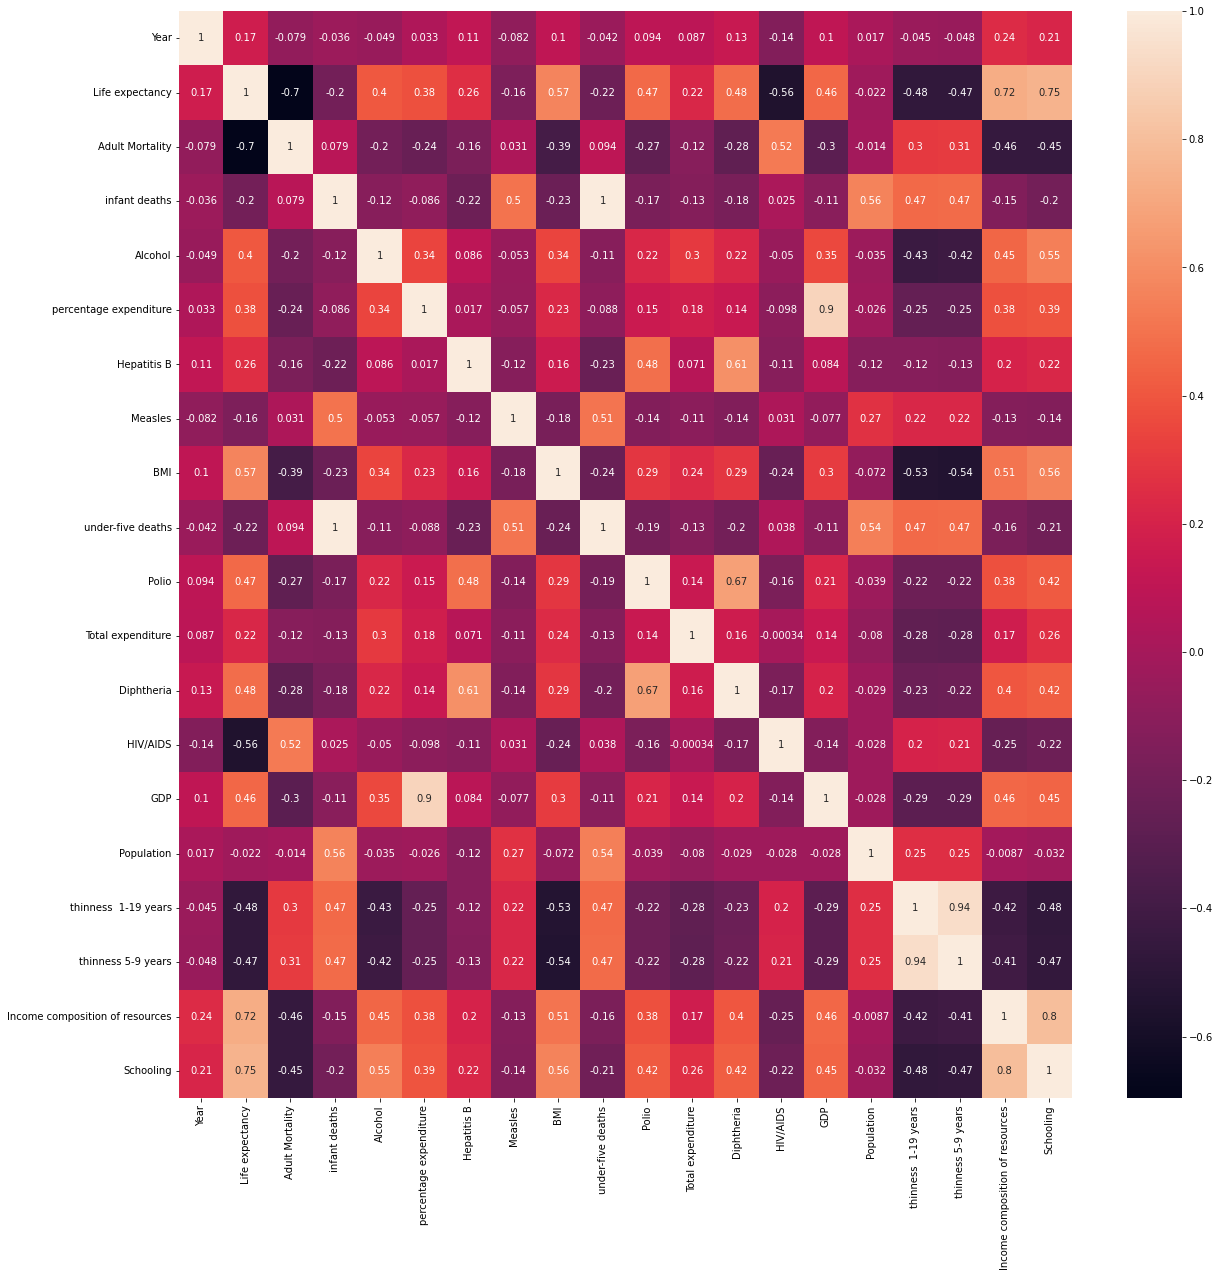

In [ ]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10  BMI                              2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

In [ ]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

* Teraz odstanime nan z datasetu
* Hodnoty doplname podla mean z inych rokov ak vsak vsetky roky mau hodnotu nan pouzijeme mean zo vsetkych krajin

In [ ]:
#function to remove nans feom dataset
def remove_nan(df):
    for col in df.columns:
        if df[col].isnull().sum() != 0:
            df[col] = df.groupby(['Country'], sort=False)[col].apply(lambda x: x.fillna(np.mean(x)) if ~np.isnan(x.mean())  else x.fillna(df[col].mean()))
    return df

In [ ]:
df = remove_nan(df)
print(df.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


* Vidime ze dataset obsahuje priznaky s typom object a hodnoty typu nan
* Najprv vyriesime stlpce obsahujuce hodnoty object a to takto:
 1. Stlpec County odstranime
 2. Hodnoty stlpepca Status nahradime takto 0: developing, 1:developed 

In [ ]:
df = df.drop(columns = ['Country'])
df["Status"] = df["Status"].map({'Developed':1,'Developing':0})
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Dalej pokracujeme v evaluacii

In [ ]:
# function to split data for training and testing model
def split_data(df):
    X, X_test, y, y_test = train_test_split(df.drop(columns = ['Life expectancy']), df['Life expectancy'], test_size=0.25, random_state=random_seed)
    print('Train X shape', X.shape)
    print('Test X shape', X_test.shape)
    return X, X_test, y, y_test

In [ ]:
# function to plot regression prediction
def plot_prediction_results(title, true, predicted):
    fig = go.Figure(data=go.Scatter(x=[30, 100], y=[30, 100], mode="lines+markers", name="y = ŷ"))
    fig.add_scatter(x=true, y=predicted, name="test, prediction", mode="markers")
    fig.update_layout(
        title=f"Visualization of predictions: {title}",
        xaxis_title="Real values",
        yaxis_title="Predicted values",
    )
    fig.update_yaxes(scaleanchor = "x", scaleratio = 1)
    fig.update_xaxes(scaleanchor = "y", scaleratio = 1) 
    fig.show()

In [ ]:
#function to evaluate linear regression
def eval_lr(X, X_test, y, y_test):
    Linear_model= LinearRegression()
    Linear_model.fit(X,y)

    y_hat=Linear_model.predict(X_test)
    err = mean_absolute_error(y_test, y_hat)
    print("MAE score of linear regression equals to:", err)
    print("R2 score of linear regression equals to:", r2_score(y_test,y_hat))
    plot_prediction_results('Linear regresion', y_test, y_hat)
    return err

In [ ]:
from typing import Callable, Tuple
#evaluate model with alpha
def ridge_model(X, y) -> Callable[[float], float]:
    def inner(alpha: float) -> float:
        model = Ridge(alpha=alpha)
        return -np.mean(cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error'))
    
    return inner

In [ ]:
# function to find model with optimal alpha 
def get_ridge_model(X, y):
    opt_function = ridge_model(X, y)
    
    opt_alpha = optimize.minimize_scalar(
        opt_function, options={'maxiter': 50}, method='bounded', bounds=(0.1, 400)
    )
    
    best_model = Ridge(alpha=opt_alpha.x)
    best_model.fit(X, y)
    print("Optimal alpha:", opt_alpha.x)
    return best_model

In [ ]:
# function to evaluate ridge regression
def eval_rr(model, X_test, y_test):
    rr_pred = model.predict(X_test)
    #rr_coef = model.coef_
    rr_error = mean_absolute_error(y_test, rr_pred)
    plot_prediction_results("Ridge Regression", y_test, rr_pred)
    print("MAE score of ridge regression equals to:", rr_error)
    print("R2 score of ridge regression equals to:", r2_score(y_test,rr_pred))
    return rr_error

In [ ]:
#function to evaluate dataset with random forest
def eval_rf(X, X_test, y, y_test):
    param_grid = {
        'n_estimators': range(1, 100, 5),
        'max_depth': range(2, 5),
        'random_state': [random_seed],
    }
    param_comb = ParameterGrid(param_grid)
    val_acc = []

    for params in param_comb:
        #print(params)
        rf = RandomForestRegressor(**params)
        score = -np.mean(cross_val_score(rf, X, y, cv=5, scoring='neg_mean_absolute_error'))
        val_acc.append(score)
        #print(score)

    rf = RandomForestRegressor(**param_comb[np.argmin(val_acc)])
    rf.fit(X, y)
    err = mean_absolute_error(y_test, rf.predict(X_test))
    print("MAE score of random forest equals to:", err)
    print("R2 score of random forest equals to:", r2_score(y_test, rf.predict(X_test)))
    return err

In [ ]:
#splitting and evaluating
X, X_test, y, y_test = split_data(df)
lr_err_1 = eval_lr(X, X_test, y, y_test)
model = get_ridge_model(X, y)
rr_err_1 = eval_rr(model ,X_test, y_test)
rf_err_1 = eval_rf(X, X_test, y, y_test)

Train X shape (2196, 20)
Test X shape (732, 20)
MAE score of linear regression equals to: 2.977027868042116
R2 score of linear regression equals to: 0.8160217000650741


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=3.17094e-17): result may not be accurate.

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=3.24342e-17): result may not be accurate.

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=3.23865e-17): result may not be accurate.

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=3.09443e-17): result may not be accurate.

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=4.87782e-17): result may not be accurate.

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:


MAE score of ridge regression equals to: 2.977096215857084
R2 score of ridge regression equals to: 0.8160138550972009
MAE score of random forest equals to: 2.08920327510514
R2 score of random forest equals to: 0.906605936397576


* Vidime, ze hrebenova regresia nam hadze warnings, to je sposobene rozdielmi v datach. Neskor opravime pomocou normalizacie
* Porovname vysledky chyb

In [ ]:
#function plots errors in bar diagram
def plot_res(lr_err, rr_err, rf_err):
    fig = px.bar(x=["Linear Reg.", "Ridge Reg.", "Random Forest"], y=[lr_err, rr_err, rf_err])
    fig.update_layout(
        title=f"MAE comparison",
        xaxis_title="Method",
        yaxis_title="MAE value",
        yaxis={"range": [1, 4]},
        xaxis={"type": "category"}
    )
    fig.show()

In [ ]:
plot_res(lr_err_1, rr_err_1, rf_err_1)

* Z grafu vidime ze najlepsie vysledky mala metoda random forest 
* Regresie mali priblizne rovnaku MAE
* Za lepsi vysledok random forestu platime dlhsim vypocetnym casom

* Skusime teraz pridat standardizaciu/normalizaciu
* Zacneme scalermi definovanymi v sklearn
* Tieto upravy by nam mali pomoct riesit problem s outlinermi

In [ ]:
# copy dataframe
df1 = df.copy()

In [ ]:
models = [StandardScaler(), MinMaxScaler(), RobustScaler()]
names = ["StandardScaler", "MinMaxScaler", "RobustScaler"]

In [ ]:
#iterate througth scalers, apply and evaluate
errs = []
for model in models:
    X, X_test, y, y_test = split_data(df)
    scaler = model.fit(X)
    X_train_scaled = scaler.transform(X)
    X_test_scaled = scaler.transform(X_test)

    lr_err = eval_lr(X_train_scaled, X_test_scaled, y, y_test)
    model = get_ridge_model(X_train_scaled, y)
    rr_err = eval_rr(model ,X_test_scaled, y_test)
    rf_err = eval_rf(X_train_scaled, X_test_scaled, y, y_test)
    errs.append([lr_err, rr_err, rf_err])

#plot results
i = 0
for lr_err, rr_err, rf_err in errs:
    print(names[i])
    plot_res(lr_err, rr_err, rf_err)
    i += 1

Train X shape (2196, 20)
Test X shape (732, 20)
MAE score of linear regression equals to: 2.977027868046797
R2 score of linear regression equals to: 0.816021700035679


Optimal alpha: 1.5274445025338734


MAE score of ridge regression equals to: 2.972965004488198
R2 score of ridge regression equals to: 0.8160514375621537
MAE score of random forest equals to: 2.0895613900486008
R2 score of random forest equals to: 0.9066040180546933
Train X shape (2196, 20)
Test X shape (732, 20)
MAE score of linear regression equals to: 2.977027868046797
R2 score of linear regression equals to: 0.8160217000356791


Optimal alpha: 0.10000406819977517


MAE score of ridge regression equals to: 3.0245238395260565
R2 score of ridge regression equals to: 0.8110052014318238
MAE score of random forest equals to: 2.0898180480438464
R2 score of random forest equals to: 0.9065327769041669
Train X shape (2196, 20)
Test X shape (732, 20)
MAE score of linear regression equals to: 2.977027868046799
R2 score of linear regression equals to: 0.8160217000356785


Optimal alpha: 16.44681860891394


MAE score of ridge regression equals to: 2.9743686346122833
R2 score of ridge regression equals to: 0.8160688305549187
MAE score of random forest equals to: 2.090971080318643
R2 score of random forest equals to: 0.9065599189522902
StandardScaler


MinMaxScaler


RobustScaler


* Z grafou vidime ze najlepsie vysledky nam daval standar scaler a to pri hrebenovej regresii
* Islo vsak len o jemne zlepsenie
* Zhorsili sa nam vsak vysledky pri metode random forest
* Skusime pouzit teraz nami delinovanu logaritmicku transformaciu

In [ ]:
df = df1.copy()
#logaritmic transformation of dataset
def log_transform(X, X_test):
    X = X.applymap(lambda x: np.log(x+1))
    X_test = X_test.applymap(lambda x: np.log(x+1))
    return X, X_test

#transform
X, X_test, y, y_test = split_data(df)
X, X_test = log_transform(X, X_test)

lr_err = eval_lr(X, X_test, y, y_test)
model = get_ridge_model(X, y)
rr_err = eval_rr(model ,X_test, y_test)
rf_err = eval_rf(X, X_test, y, y_test)
plot_res(lr_err, rr_err, rf_err)

Train X shape (2196, 20)
Test X shape (732, 20)
MAE score of linear regression equals to: 2.8892858570863686
R2 score of linear regression equals to: 0.8401382040740293


Optimal alpha: 0.10000406819977517


MAE score of ridge regression equals to: 2.8887637072763597
R2 score of ridge regression equals to: 0.8391176067170039
MAE score of random forest equals to: 2.0911644891020456
R2 score of random forest equals to: 0.9065823083338173


* Vidime vyraznejsie zlepsenie oproti scalerom
* Tentokrat mala lepsi vysledok linearna regresia a skore random forestu sa znova jemne zhorsilo

* Teraz skusime experimentovat s pridavanim stlpcov
* Vytvorime vsetky dvojice stlpcov a tie vynasobime, nasledne odhadneme chybu pomocou linearne regresie
* Najlepsie 2 stlpce pridame do nasho dataframu

In [ ]:
from itertools import combinations

#create columns combinations with size 2
df = df1.copy()
X, X_test, y, y_test = split_data(df)
column_list = X.columns
interactions = list(combinations(column_list, 2))
print(interactions)

Train X shape (2196, 20)
Test X shape (732, 20)
[('Year', 'Status'), ('Year', 'Adult Mortality'), ('Year', 'infant deaths'), ('Year', 'Alcohol'), ('Year', 'percentage expenditure'), ('Year', 'Hepatitis B'), ('Year', 'Measles'), ('Year', 'BMI'), ('Year', 'under-five deaths'), ('Year', 'Polio'), ('Year', 'Total expenditure'), ('Year', 'Diphtheria'), ('Year', 'HIV/AIDS'), ('Year', 'GDP'), ('Year', 'Population'), ('Year', 'thinness  1-19 years'), ('Year', 'thinness 5-9 years'), ('Year', 'Income composition of resources'), ('Year', 'Schooling'), ('Status', 'Adult Mortality'), ('Status', 'infant deaths'), ('Status', 'Alcohol'), ('Status', 'percentage expenditure'), ('Status', 'Hepatitis B'), ('Status', 'Measles'), ('Status', 'BMI'), ('Status', 'under-five deaths'), ('Status', 'Polio'), ('Status', 'Total expenditure'), ('Status', 'Diphtheria'), ('Status', 'HIV/AIDS'), ('Status', 'GDP'), ('Status', 'Population'), ('Status', 'thinness  1-19 years'), ('Status', 'thinness 5-9 years'), ('Status', 

In [ ]:
#evaluate dataset with linear regression for every combination and save them by error
interaction_dict = {}

for interaction in interactions:
    X_train_int = X
    X_train_int['int'] = X_train_int[interaction[0]] * X_train_int[interaction[1]]
    lr3 = LinearRegression()
    lr3.fit(X_train_int, y)
    interaction_dict[lr3.score(X_train_int, y)] = interaction

In [ ]:
#sort and get top 2 columns
top_2 = sorted(interaction_dict.keys(), reverse = True)[:2]
for interaction in top_2:
    print(interaction_dict[interaction])
print(interaction_dict.keys())

('Adult Mortality', 'HIV/AIDS')
('BMI', 'Diphtheria')
dict_keys([0.8208273565206575, 0.8242404572663751, 0.8203156850641354, 0.8206211085049488, 0.8200638307300641, 0.8202759383123963, 0.8204352314041437, 0.8200410492338193, 0.8202964401281332, 0.8201048435307197, 0.8204148738125208, 0.8200360014997488, 0.8233188565384443, 0.820176919369541, 0.8200259604676782, 0.8211509300965898, 0.8214098278483426, 0.8259290791154108, 0.8212496892102257, 0.8205345826724998, 0.8206349178918931, 0.8223237010177091, 0.8227098640571383, 0.8200663094289631, 0.8201450308295437, 0.822793715304546, 0.820708486050109, 0.8202251601485107, 0.8200323739038742, 0.8202893546731026, 0.8200259602838421, 0.8212059236177428, 0.8200951433650507, 0.8223033766184957, 0.8225555693418453, 0.8200907748399207, 0.820968626577715, 0.8203040984502277, 0.820225404728365, 0.8204331731383572, 0.8202598367368579, 0.8200830949990119, 0.8200593617728138, 0.8203762148428912, 0.8202588640170578, 0.8204446299362411, 0.8207962272357853, 

In [ ]:
#create new columns and add to test and train datasets
X_train_int = X.copy()
X_train_int['ad_ha'] = X_train_int['Adult Mortality'] * X_train_int['HIV/AIDS']
X_train_int['bm_di'] = X_train_int['BMI'] * X_train_int['Diphtheria']
X_test['ad_ha'] = X_test['Adult Mortality'] * X_test['HIV/AIDS']
X_test['bm_di'] = X_test['BMI'] * X_test['Diphtheria']
X_train_int.drop(['int'], axis=1, inplace=True)

X_train_int.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,ad_ha,bm_di
1181,2004,1,65.0,0,6.79,8506.101443,80.960842,0,56.5,0,...,99.0,0.1,46917.272160,2.927400e+04,1.0,0.9,0.873000,18.300000,6.5,5593.5
2389,2003,0,344.0,48,0.01,0.000000,42.000000,8257,19.0,78,...,4.0,0.9,297.473345,1.276454e+07,7.7,7.5,0.627419,11.999639,309.6,76.0
620,2003,0,417.0,9,2.45,0.000000,50.777778,3712,2.7,14,...,5.0,6.8,7494.210719,1.276454e+07,9.1,8.8,0.492000,9.400000,2835.6,13.5
747,2005,1,92.0,0,11.28,7627.412444,80.960842,2,55.0,0,...,93.0,0.1,48799.823700,5.419432e+06,1.2,1.0,0.897000,16.600000,9.2,5115.0
1257,2008,1,75.0,0,12.66,9528.230574,86.833333,57,57.4,0,...,93.0,0.1,61235.415000,4.489544e+06,0.3,0.2,0.908000,17.900000,7.5,5338.2


In [ ]:
#evaluate and plot results
lr_err = eval_lr(X_train_int, X_test, y, y_test)
model = get_ridge_model(X_train_int, y)
rr_err = eval_rr(model ,X_test, y_test)
rf_err = eval_rf(X_train_int, X_test, y, y_test)
plot_res(lr_err, rr_err, rf_err)

MAE score of linear regression equals to: 2.789697397356093
R2 score of linear regression equals to: 0.8363688009260646


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=3.16827e-17): result may not be accurate.

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=3.24273e-17): result may not be accurate.

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=3.23442e-17): result may not be accurate.

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=3.09051e-17): result may not be accurate.

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=4.8729e-17): result may not be accurate.

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:



MAE score of ridge regression equals to: 2.789800571260554
R2 score of ridge regression equals to: 0.8363588794849417
MAE score of random forest equals to: 2.111414065851792
R2 score of random forest equals to: 0.9034269580994471


* Znova mozeme pozorovat zlepsenie u regresii a jemne zhorsenie u random forestu oproti povodnemu modelu
* Nasledne skusime na upravenom modeli podobnu metodu kde budeme umocnovat stlpce

In [ ]:
df = df1.copy()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_dict = {}
for feature in X_train_int.columns:
    for p in range(2, 5):
        X_train_poly = X_train_int
        X_train_poly['sq'] = X_train_poly[feature] ** p
        lr = LinearRegression()
        lr.fit(X_train_poly, y)
        poly_dict[lr.score(X_train_poly, y)] = [feature, p]
    
poly_dict[max(poly_dict.keys())]

['Adult Mortality', 2]

In [ ]:
#apply best result
X_train_final = X_train_int
X_train_final['adm_cubed'] = X_train_final['Adult Mortality'] ** 2
X_train_final.drop('sq', axis = 1, inplace = True)
X_test['adm_cubed'] = X_test['Adult Mortality'] ** 2

In [ ]:
#evaluate
lr_err = eval_lr(X_train_int, X_test, y, y_test)
model = get_ridge_model(X_train_int, y)
rr_err = eval_rr(model ,X_test, y_test)
rf_err = eval_rf(X_train_int, X_test, y, y_test)
plot_res(lr_err, rr_err, rf_err)

MAE score of linear regression equals to: 2.5642458466200955
R2 score of linear regression equals to: 0.8643874193560124


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=3.16738e-17): result may not be accurate.

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=3.24155e-17): result may not be accurate.

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=3.2333e-17): result may not be accurate.

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=3.09048e-17): result may not be accurate.

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=4.8726e-17): result may not be accurate.

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:

I

MAE score of ridge regression equals to: 2.564345430767552
R2 score of ridge regression equals to: 0.8643813056764815
MAE score of random forest equals to: 2.1108327853056355
R2 score of random forest equals to: 0.9034494408915916


* Podla vysledkov mozeme sledovat ze sa nam nase odhadi podarilo spresnit
* Predeme tentokrat na inu metodu
* Namiesto odstanovania priznaku country spravime one one encoding a vytvorime tak pre kazdy stat vlastny stlpec
* Podobne spravime aj s priznakom developed

In [ ]:
df = pd.read_csv('LifeExpectancyData.csv')
df.columns = df.columns.str.strip()
df = df[df['Life expectancy'].notna()]
print(df.isnull().sum())

df = remove_nan(df)
print(df.isnull().sum())

#Creating dummy variables
Country_dummy=pd.get_dummies(df['Country'])
status_dummy=pd.get_dummies(df['Status'])
df.drop(['Country','Status'],inplace=True,axis=1)
df=pd.concat([df,Country_dummy,status_dummy],axis=1)
df.head(10)

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64
Country                            0
Year                               0
Status                             0
Life expectancy   

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Developed,Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0,0,0,0,0,0,0,0,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0,0,0,0,0,0,0,0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0,0,0,0,0,0,0,0,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0,0,0,0,0,0,0,0,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0,0,0,0,0,0,0,0,0,1
5,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,...,0,0,0,0,0,0,0,0,0,1
6,2009,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,...,0,0,0,0,0,0,0,0,0,1
7,2008,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,...,0,0,0,0,0,0,0,0,0,1
8,2007,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,...,0,0,0,0,0,0,0,0,0,1
9,2006,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X, X_test, y, y_test = split_data(df)

Train X shape (2196, 204)
Test X shape (732, 204)


In [ ]:
lr_err = eval_lr(X, X_test, y, y_test)
model = get_ridge_model(X, y)
rr_err = eval_rr(model ,X_test, y_test)
rf_err = eval_rf(X, X_test, y, y_test)
plot_res(lr_err, rr_err, rf_err)

MAE score of linear regression equals to: 1.2239708500183628
R2 score of linear regression equals to: 0.9579385617271233


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=2.69743e-17): result may not be accurate.

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=2.7911e-17): result may not be accurate.

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=2.71483e-17): result may not be accurate.

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=2.65584e-17): result may not be accurate.

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=2.75373e-17): result may not be accurate.

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:



MAE score of ridge regression equals to: 1.2331982541996833
R2 score of ridge regression equals to: 0.9578655092587435


MAE score of random forest equals to: 2.0887392344115074
R2 score of random forest equals to: 0.9067096190858748


* Vidime vyrazne zlepsenie oproti ostatnym modelom
* Regresia presnejsie odhaduje realne hodnoty a vychylenia sa znizili
* Aplikujeme na tento model este logaritmicku transformaciu, ktora mala u nas najlepsie vysledky

In [ ]:
#apply log transformation and evaluate
X, X_test = log_transform(X, X_test)

lr_err_1 = eval_lr(X, X_test, y, y_test)
model = get_ridge_model(X, y)
rr_err_1 = eval_rr(model ,X_test, y_test)
rf_err_1 = eval_rf(X, X_test, y, y_test)


MAE score equals to: 1.1973359363326606
R2 score: 0.9586488485627336


Optimal alpha: 0.10000406819977517


MAE score equals to: 1.3535803710656273
R2 score: 0.9537547863749085
MAE score equals to: 2.090812783169976
R2 score equals to: 0.9066736621245564


MAE score of linear regression equals to: 1.1973359363326606
R2 score of linear regression equals to: 0.9586488485627336


Optimal alpha: 0.10000406819977517


MAE score of ridge regression equals to: 1.3535803710656273
R2 score of ridge regression equals to: 0.9537547863749085
MAE score of random forest equals to: 2.090812783169976
R2 score of random forest equals to: 0.9066736621245564


* Doslo k minimalnemu zlepseniu
* Najlepsie dopadla linearna regresia
* Aplikujeme aj ostatne scalery

In [ ]:
#apply scalers and evaluate
errs = []
for model in models:
    X, X_test, y, y_test = split_data(df)
    scaler = model.fit(X)
    X_train_scaled = scaler.transform(X)
    X_test_scaled = scaler.transform(X_test)

    lr_err = eval_lr(X_train_scaled, X_test_scaled, y, y_test)
    model = get_ridge_model(X_train_scaled, y)
    rr_err = eval_rr(model ,X_test_scaled, y_test)
    rf_err = eval_rf(X_train_scaled, X_test_scaled, y, y_test)
    errs.append([lr_err, rr_err, rf_err])

for lr_err, rr_err, rf_err in errs:
    plot_res(lr_err, rr_err, rf_err)

Train X shape (2196, 204)
Test X shape (732, 204)
MAE score equals to: 1.2240859735806486
R2 score: 0.9579374361674317


Optimal alpha: 0.10000406819977517


MAE score equals to: 1.2202505083940562
R2 score: 0.9583357211226526
MAE score equals to: 2.0892275811450363
R2 score equals to: 0.9066875113283274
Train X shape (2196, 204)
Test X shape (732, 204)
MAE score equals to: 1.2240591914275953
R2 score: 0.9579344544762678


Optimal alpha: 0.10000406819977517


MAE score equals to: 1.2280915103529997
R2 score: 0.9587196030532085
MAE score equals to: 2.089466342111777
R2 score equals to: 0.9066179497627489
Train X shape (2196, 204)
Test X shape (732, 204)
MAE score equals to: 1.2239756182894679
R2 score: 0.9579384141713096


Optimal alpha: 0.10000406819977517


MAE score equals to: 1.2330561264306708
R2 score: 0.9578796220387067
MAE score equals to: 2.090507039625011
R2 score equals to: 0.906663207956836


Train X shape (2196, 204)
Test X shape (732, 204)
MAE score of linear regression equals to: 1.2240859735806486
R2 score of linear regression equals to: 0.9579374361674317


Optimal alpha: 0.10000406819977517


MAE score of ridge regression equals to: 1.2202505083940562
R2 score of ridge regression equals to: 0.9583357211226526
MAE score of random forest equals to: 2.0892275811450363
R2 score of random forest equals to: 0.9066875113283274
Train X shape (2196, 204)
Test X shape (732, 204)
MAE score of linear regression equals to: 1.2240591914275953
R2 score of linear regression equals to: 0.9579344544762678


Optimal alpha: 0.10000406819977517


MAE score of ridge regression equals to: 1.2280915103529997
R2 score of ridge regression equals to: 0.9587196030532085
MAE score of random forest equals to: 2.089466342111777
R2 score of random forest equals to: 0.9066179497627489
Train X shape (2196, 204)
Test X shape (732, 204)
MAE score of linear regression equals to: 1.2239756182894679
R2 score of linear regression equals to: 0.9579384141713096


Optimal alpha: 0.10000406819977517


MAE score of ridge regression equals to: 1.2330561264306708
R2 score of ridge regression equals to: 0.9578796220387067
MAE score of random forest equals to: 2.090507039625011
R2 score of random forest equals to: 0.906663207956836


* Vidime ze najlepsie vysledky mala hrebenova regresia so standardizaciov vysledkov
* Tento model berieme ako finalny a vysledok nasich experimentov

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3decce74-8934-49ff-b71e-4fd91e89be8b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>